# Feature selection
-----
- z-stack Movies were prepared from the merged tilescan images
- We are now ready for feature extraction from the movies


In [1]:
%matplotlib notebook

# Dependencies

import os
import cv2
import merging_functions as mf
import numpy as np
import tracker as tr

from matplotlib import pyplot as plt

In [2]:
# Go through each merged file and collect the resized image in a numpy array
def get_image_sequence(merged_folder, exp_name, acq_name, t_str, zstr_ar, img_dims):
    # Initialize the img numpy array
    img_seq = np.zeros((img_dims[0], img_dims[1], len(zstr_ar)))
    # Go over each z-stack image
    for zix in range(len(zstr_ar)):
        z_str = zstr_ar[zix]
        # Collect the path of the merged files
        merged_path = os.path.join(merged_folder, 
                                   f"{exp_name}_{acq_name}",
                                   f"{exp_name}_{acq_name}_Merged_{t_str}_{z_str}.tif")
        
        print(f"Collecting the image arrays for image file: \n\t{merged_path}")        
        # Read the image
        img = cv2.imread(merged_path)
        
        # Process the image for increased contrast
        img_blur = cv2.GaussianBlur(img, (11,11),0)
        
        # Add contrast for better visualization.
        alpha = 20
        beta = -10
        img_contrast = np.uint8(np.clip(alpha*img_blur + beta, 0, 255))        
        
        # Resize the image with given dimensions
        img_resized = cv2.resize(img_contrast, (img_dims[0], img_dims[1]))
        
        # Convert to grayscale image
        frame_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
        
        # Add to the numpy array
        img_seq[:,:,zix] = frame_gray

    return img_seq


In [5]:
# exp_name = "EQ59_Fru_04032021"
# acq_name = "TileScan_Tp1-7"
# inner = True
# radius = 150

exp_name = "EQ59_Glu_04172021"
plt_ids = [1,1,1,2,2,3,3,3,4,4,5,5]
tp_ids = [2,8,12,3,7,1,6,11,5,10,4,9]

# exp_name = "EQ59_Gly_04172021"
# plt_ids = [3,2,1,4,3,2,1,5,4,3,2,1]
# tp_ids = [1,2,3,4,5,6,7,8,9,10,11,12]
exp_folder = os.path.join("E:", "Tolga", f"{exp_name}")
acq_name_lst = []
for ix in range(len(plt_ids)):
    acq_name = f"TileScan_Plt{plt_ids[ix]}_Tp{tp_ids[ix]}"
    acq_name_lst.append(acq_name)

inner = True

exp_folder = os.path.join("E:", "Tolga", exp_name)
# video_folder = os.path.join(exp_folder, "Videos_Marked", f"{exp_name}_{acq_name}")
merged_folder = os.path.join(exp_folder, "Merged")

metadata = mf.collect_metadata(exp_folder, exp_name, acq_name, inner)

In [7]:
metadata

{'dimensions': {'X': {'Length': 598.8,
   'NumberOfElements': 1024,
   'Unit': 'um',
   'Voxel': 0.585},
  'Y': {'Length': 598.8,
   'NumberOfElements': 1024,
   'Unit': 'um',
   'Voxel': 0.585},
  'Z': {'Length': -398.64,
   'NumberOfElements': 94,
   'Unit': 'um',
   'Voxel': -4.286},
  'Stage': {'Length': '0.00',
   'NumberOfElements': 9,
   'Unit': '',
   'Voxel': None}},
 'tiles': {'xix_lst': array([0, 0, 0, 1, 1, 1, 2, 2, 2]),
  'yix_lst': array([0, 1, 2, 0, 1, 2, 0, 1, 2]),
  'xix_unique_ar': array([0, 1, 2]),
  'yix_unique_ar': array([0, 1, 2]),
  'xpos_lst': array([71038.6687404, 71038.6687404, 71038.6687404, 71577.5847804,
         71577.5847804, 71577.5847804, 72116.5008204, 72116.5008204,
         72116.5008204]),
  'ypos_lst': array([48943.5256512, 49482.4416912, 50021.3577312, 48943.5256512,
         49482.4416912, 50021.3577312, 48943.5256512, 49482.4416912,
         50021.3577312]),
  'tile_xcnt': 3,
  'tile_ycnt': 3},
 'exp_folder': 'E:Tolga\\EQ59_Glu_04172021',
 'acq_

In [1]:
xvoxel = metadata["dimensions"]["X"]["Voxel"]
yvoxel = metadata["dimensions"]["Y"]["Voxel"]
xpos_lst = metadata["dimensions"]["tiles"]["xpos_lst"]

NameError: name 'metadata' is not defined

## Locate the center and the ROI of the image

In [8]:
t_str = "t0"
zsz = metadata["dimensions"]["Z"]["NumberOfElements"]
# Find the number of digits
znum_digit = len(str(zsz))
# zstr for file path
zstr_holder = f"z%0{znum_digit}d"

# calculate z_strar for each z_str value
z_strar = np.zeros(zsz, dtype="<U6")
for zix in range(zsz):
    z_strar[zix] = zstr_holder % zix

zar = np.arange(0,zsz)
img_seq = get_image_sequence(merged_folder, exp_name, acq_name, t_str, z_strar, (512,512))

	E:Tolga\EQ59_Glu_04172021\Merged\EQ59_Glu_04172021_TileScan_Plt5_Tp9\EQ59_Glu_04172021_TileScan_Plt5_Tp9_Merged_t0_z00.tif
	E:Tolga\EQ59_Glu_04172021\Merged\EQ59_Glu_04172021_TileScan_Plt5_Tp9\EQ59_Glu_04172021_TileScan_Plt5_Tp9_Merged_t0_z01.tif
	E:Tolga\EQ59_Glu_04172021\Merged\EQ59_Glu_04172021_TileScan_Plt5_Tp9\EQ59_Glu_04172021_TileScan_Plt5_Tp9_Merged_t0_z02.tif
	E:Tolga\EQ59_Glu_04172021\Merged\EQ59_Glu_04172021_TileScan_Plt5_Tp9\EQ59_Glu_04172021_TileScan_Plt5_Tp9_Merged_t0_z03.tif
	E:Tolga\EQ59_Glu_04172021\Merged\EQ59_Glu_04172021_TileScan_Plt5_Tp9\EQ59_Glu_04172021_TileScan_Plt5_Tp9_Merged_t0_z04.tif
	E:Tolga\EQ59_Glu_04172021\Merged\EQ59_Glu_04172021_TileScan_Plt5_Tp9\EQ59_Glu_04172021_TileScan_Plt5_Tp9_Merged_t0_z05.tif
	E:Tolga\EQ59_Glu_04172021\Merged\EQ59_Glu_04172021_TileScan_Plt5_Tp9\EQ59_Glu_04172021_TileScan_Plt5_Tp9_Merged_t0_z06.tif
	E:Tolga\EQ59_Glu_04172021\Merged\EQ59_Glu_04172021_TileScan_Plt5_Tp9\EQ59_Glu_04172021_TileScan_Plt5_Tp9_Merged_t0_z07.tif
	E:Tolga

	E:Tolga\EQ59_Glu_04172021\Merged\EQ59_Glu_04172021_TileScan_Plt5_Tp9\EQ59_Glu_04172021_TileScan_Plt5_Tp9_Merged_t0_z49.tif
	E:Tolga\EQ59_Glu_04172021\Merged\EQ59_Glu_04172021_TileScan_Plt5_Tp9\EQ59_Glu_04172021_TileScan_Plt5_Tp9_Merged_t0_z50.tif
	E:Tolga\EQ59_Glu_04172021\Merged\EQ59_Glu_04172021_TileScan_Plt5_Tp9\EQ59_Glu_04172021_TileScan_Plt5_Tp9_Merged_t0_z51.tif
	E:Tolga\EQ59_Glu_04172021\Merged\EQ59_Glu_04172021_TileScan_Plt5_Tp9\EQ59_Glu_04172021_TileScan_Plt5_Tp9_Merged_t0_z52.tif
	E:Tolga\EQ59_Glu_04172021\Merged\EQ59_Glu_04172021_TileScan_Plt5_Tp9\EQ59_Glu_04172021_TileScan_Plt5_Tp9_Merged_t0_z53.tif
	E:Tolga\EQ59_Glu_04172021\Merged\EQ59_Glu_04172021_TileScan_Plt5_Tp9\EQ59_Glu_04172021_TileScan_Plt5_Tp9_Merged_t0_z54.tif
	E:Tolga\EQ59_Glu_04172021\Merged\EQ59_Glu_04172021_TileScan_Plt5_Tp9\EQ59_Glu_04172021_TileScan_Plt5_Tp9_Merged_t0_z55.tif
	E:Tolga\EQ59_Glu_04172021\Merged\EQ59_Glu_04172021_TileScan_Plt5_Tp9\EQ59_Glu_04172021_TileScan_Plt5_Tp9_Merged_t0_z56.tif
	E:Tolga

In [9]:
img_seq.shape

(512, 512, 94)

In [40]:
# ## 24-48h
# centerx = 248
# centery = 245
# radius = 150

# ## 12-24h
centerx = 229
centery = 218
radius = 129


# ## 48-72h
# centerx = 245
# centery = 242
# radius = 150

img_seq_circle = np.zeros((512, 512, zsz), dtype=np.uint8) # numpy 3d array image sequence to track max intensity images
img_seq_circle_thresh = np.zeros_like(img_seq_circle) # numpy 3d array image sequence to track max intensity images
for zix in range(zsz):
    roi_image = img_seq[:, :, zix]
    blurred_image = cv2.GaussianBlur(roi_image, (15,15), 0).astype(np.uint8)
    _, thresh_image = cv2.threshold(blurred_image, 80, 255, cv2.THRESH_BINARY)
    cv2.circle(blurred_image, (centerx, centery), radius, (255,255,255), 1)
    img_seq_circle[:,:,zix] = blurred_image
    img_seq_circle_thresh[:,:,zix] = thresh_image
    

In [30]:
_,thresh_img = cv2.threshold(img_seq_circle[:,:,43], 130, 255, cv2.THRESH_BINARY)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [45]:
_, thresh_img = cv2.threshold(img_seq_circle[:,:,52], 80, 255, cv2.THRESH_BINARY)

thresh_img = img_seq_circle_thresh[:,:,52]
((x,y), rad) = cv2.minEnclosingCircle(thresh_img)
fig,ax = plt.subplots()
ax.imshow(thresh_img)

print(f"(x,y): = ({x},{y}), rad: = {rad}")
# cv2.findContours(thresh_img)

error: OpenCV(4.5.0) ..\modules\imgproc\src\shapedescr.cpp:201: error: (-215:Assertion failed) count >= 0 && (depth == CV_32F || depth == CV_32S) in function 'cv::minEnclosingCircle'


<IPython.core.display.Javascript object>


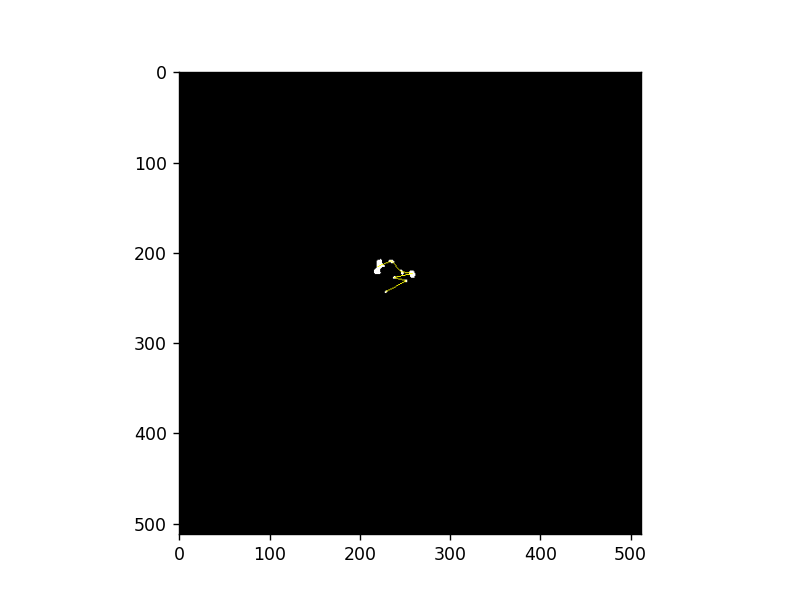

[array([[[223, 207]],

       [[222, 208]],

       [[220, 208]],

       [[219, 209]],

       [[219, 216]],

       [[216, 219]],

       [[216, 222]],

       [[217, 223]],

       [[222, 223]],

       [[223, 222]],

       [[222, 221]],

       [[222, 218]],

       [[225, 215]],

       [[227, 215]],

       [[227, 214]],

       [[226, 213]],

       [[227, 212]],

       [[228, 212]],

       [[229, 211]],

       [[231, 211]],

       [[232, 210]],

       [[234, 210]],

       [[235, 211]],

       [[237, 211]],

       [[240, 214]],

       [[240, 215]],

       [[246, 221]],

       [[246, 223]],

       [[247, 224]],

       [[245, 226]],

       [[241, 226]],

       [[240, 227]],

       [[239, 226]],

       [[238, 226]],

       [[237, 227]],

       [[237, 228]],

       [[242, 228]],

       [[243, 229]],

       [[246, 229]],

       [[247, 230]],

       [[249, 230]],

       [[250, 231]],

       [[248, 233]],

       [[247, 233]],

       [[246, 234]],

       [[

In [66]:
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Find minEnclosing circle for each to obtain the center position
xar, yar, radar = [],[],[]
for contour in contours:
    ((x,y), rad) = cv2.minEnclosingCircle(contour)
    xar.append(int(x))
    yar.append(int(y))
    radar.append(rad)
    
# Draw line between each contour center
color_thresh_img = cv2.cvtColor(thresh_img, cv2.COLOR_GRAY2BGR)
for ix in range(len(xar)-1):
    cv2.line(color_thresh_img, (xar[ix], yar[ix]), (xar[ix+1], yar[ix+1]), (255,255,0))
    
fig,ax = plt.subplots()
ax.imshow(color_thresh_img)
thresh_img_2 = cv2.cvtColor(color_thresh_img, cv2.COLOR_BGR2GRAY)
contours, hierarchy = cv2.findContours(thresh_img_2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(contours)

In [70]:
len(contours)

2

In [60]:
thresh_img.dtype

dtype('uint8')

<IPython.core.display.Javascript object>


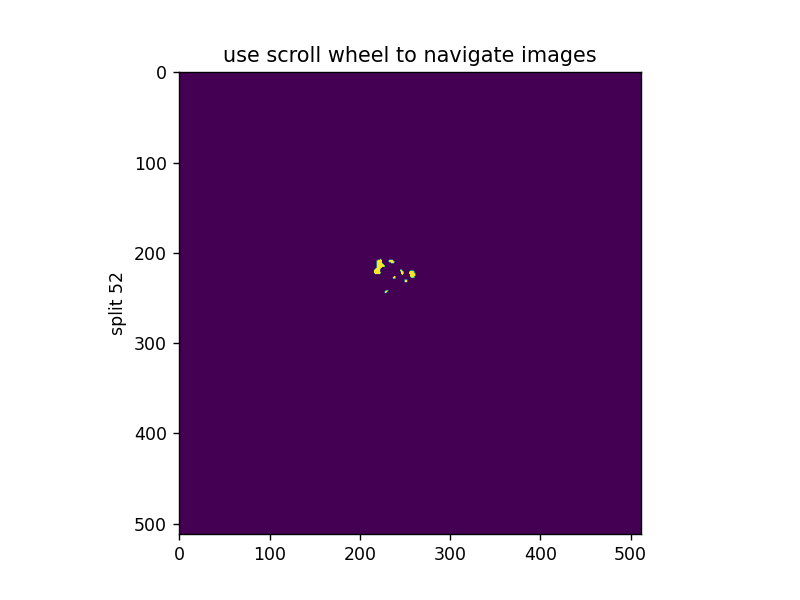

In [41]:
# Plot the image sequence in a figure
fig_maxint_img, ax = plt.subplots()
tracker = tr.IndexTracker(ax, img_seq_circle_thresh, "image", None, 20)#, args_dict)

fig_maxint_img.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()

In [61]:
dim_vid = (512,512)
radius = 129
xsz = metadata["dimensions"]["X"]["NumberOfElements"]
width = xsz*len(metadata["tiles"]["xix_unique_ar"])
scale = width/dim_vid[0]
scale

26.0

## Calculate scale and select ROI from the merged image

In [63]:
dim_vid = (512,512)
# radius = 150
# # Glycerol
# exp_name = "EQ59_Gly_03232021"
# exp_folder = os.path.join("D:", "Tolga", "Colony Images", exp_name)

# marked = True
# full_stage = False

# RR = 1800
# centerxar = np.array([147, 245, 245])
# centeryar = np.array([328, 247, 247])
# inner = True

# # Create a video for each acq_name
# acq_name_ar = ["TileScan_Tp1-9_xyzt",
#                "TileScan_Tp10-33_xyzt",
#                "TileScan_Tp34-57_xyzt"]

# # Glucose
# exp_name = "EQ59_Glu_03142021"
# exp_folder = os.path.join("D:", "Tolga", "Colony Images", exp_name)

# marked = True
# full_stage = False

# RR = 1800
# centerxar = np.array([114, 245, 245])
# centeryar = np.array([354, 247, 247])
# inner = False

# # Create a video for each acq_name
# acq_name_ar = ["TileScan_12-24h_xyzt",
#                 "TileScan_Tp10-33_xyzt",
#                 "TileScan_Tp34-57_xyzt"]

# Fructose
exp_name = "EQ59_Fru_04032021"
acq_name_ar = ["TileScan_Tp1-7",
                "TileScan_Tp8-31",
                "TileScan_Tp32-55"]
exp_folder = os.path.join("D:", "Tolga", "Colony Images", f"{exp_name}")

inner = True
marked = False
full_stage = False

# Calculate the radius and the center values
RR = 1800
centerxar = np.array([290, 229, 229])
centeryar = np.array([246, 218, 218])

for acix in range(len(acq_name_ar)):
    acq_name = acq_name_ar[acix]
    metadata = mf.collect_metadata(exp_folder, exp_name, acq_name, inner)
    
    xsz = metadata["dimensions"]["X"]["NumberOfElements"]
    width = xsz*len(metadata["tiles"]["xix_unique_ar"])
    scale = width/dim_vid[0]
    
    centerx = centerxar[acix]
    centery = centeryar[acix]
    
    Rx = centerx*scale
    Ry = centery*scale
    
    Rxleft = Rx-RR
    Rxright = Rx+RR
    if Rxleft < 0:
        Rxright = Rxright - Rxleft
        Rxleft = 0
    
    Ryleft=  Ry-RR
    Ryright = Ry+RR
    if Ryleft < 0:
        Ryright = Ryright - Ryleft
        Ryleft = 0
        
    ROIx = np.array([Rxleft, Rxright], dtype=np.int)
    ROIy = np.array([Ryleft, Ryright], dtype=np.int)

    mf.make_movie(metadata, ROIx, ROIy, RR, dim_vid, marked, full_stage)

## Calculate central sum and test for each z value
At the end, calculate the ROI from the center point +- radius*1.1 square.

In [ ]:
roix = np.array([centerx - radius, centerx + radius], dtype=np.int32)
roiy = np.array([centery - radius, centery + radius], dtype=np.int32)

roi_image = img_seq[roiy[0]:roiy[1], roix[0]:roix[1], 0]
height,width = roi_image.shape
img_seq_maxz = np.zeros((height, width, zsz)) # numpy 3d array image sequence to track max intensity images
Rar_pxl = np.arange(5,width/2, dr, dtype=np.int32)
plt_seq = np.zeros((2,len(Rar_pxl), zsz))
for zix in range(zsz):
    roi_image = img_seq[roiy[0]:roiy[1], roix[0]:roix[1], zix]
    blurred_image = cv2.GaussianBlur(roi_image, (15,15), 0).astype(np.uint8)
    # Use blurred_image for nice plots
    if zix%10 == 0:
        print(f"Calculating zix = {zix}/{zsz}", end="\r", flush=True)
    img_seq_maxz[:, :, zix] = blurred_image

    central_avg = collect_radial_data(blurred_image, Rar_pxl)
    plt_seq[0,:,zix] = Rar_pxl.copy()
    plt_seq[1,:,zix] = central_avg.copy()
    
fig_maxint_img, ax = plt.subplots(figsize=(4,4), dpi=200)
tracker = tr.IndexTracker(ax, plt_seq, "line", 70)
#     ax.set_xlim(0,40)
ax.set_ylim(0,1)
ax.set_xlabel("Radius (pxl)")
ax.set_ylabel("Average pixel brightness")
fig_maxint_img.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()

### Collect the rmax(z) and cvmax(z).

In [ ]:
def window(size):
    return np.ones(size)/float(size)

window_average = 5

# Check the central sum for height measurement

# Choose above 0.1 central average (10% filled)
rmax = np.zeros(zsz)
cmax = np.zeros(zsz)
for zix in range(zsz):
    rad = plt_seq[0,:,zix]
    cav = plt_seq[1,:,zix]
    
    cavmax = np.max(cav)   # maximum value of the central average
    cavmaxarg = np.argmax(cav)  # index of the maximum central average value
    
    rmax[zix] = rad[cavmaxarg]
    cmax[zix] = cavmax
    
    
fig,ax = plt.subplots(figsize=(4,4), dpi=200)
ax.plot(zar, np.convolve(rmax, window(window_average), 'same'))
# ax.plot(zar, rmax)